In [1]:
import random
# Global variable to count key comparisons
comparison_count = 0

# Insertion Sort with comparison count
def insertion_sort(arr):
    global comparison_count
    n = len(arr)
    for i in range(1, n):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            comparison_count += 1  # Increment comparison count
            # Swap elements
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
        comparison_count += 1  # Last comparison where arr[j] >= arr[j - 1]
    return arr


# Hybrid Sort with comparison count
def hybrid_sort(arr, S):
    global comparison_count
    if len(arr) <= S:
        insertion_sort(arr)
    else:
        if len(arr) > 1:
            mid = len(arr) // 2
            left_half = arr[:mid]
            right_half = arr[mid:]

            hybrid_sort(left_half, S)
            hybrid_sort(right_half, S)

            i = j = k = 0
            while i < len(left_half) and j < len(right_half):
                comparison_count += 1  # Increment comparison count
                if left_half[i] < right_half[j]:
                    arr[k] = left_half[i]
                    i += 1
                else:
                    arr[k] = right_half[j]
                    j += 1
                k += 1

            while i < len(left_half):
                arr[k] = left_half[i]
                i += 1
                k += 1

            while j < len(right_half):
                arr[k] = right_half[j]
                j += 1
                k += 1
            return arr


In [2]:
# Generate a random list of integers for testing
test_array = random.sample(range(1, 100), 10)
print("Original Array:", test_array)

# Perform merge sort
sorted_array = hybrid_sort(test_array.copy(),3)
print("Sorted Array:", sorted_array)
print("Number of Comparisions:", comparison_count)

Original Array: [6, 56, 94, 85, 15, 4, 58, 30, 71, 43]
Sorted Array: [4, 6, 15, 30, 43, 56, 58, 71, 85, 94]
Number of Comparisions: 25


Size 1000: Comparisons = 9448, Time = 0.0000 seconds
Size 5000: Comparisons = 59763, Time = 0.0151 seconds
Size 10000: Comparisons = 128598, Time = 0.0179 seconds
Size 50000: Comparisons = 741195, Time = 0.0998 seconds
Size 100000: Comparisons = 1582575, Time = 0.2173 seconds
Size 500000: Comparisons = 9146422, Time = 1.3104 seconds


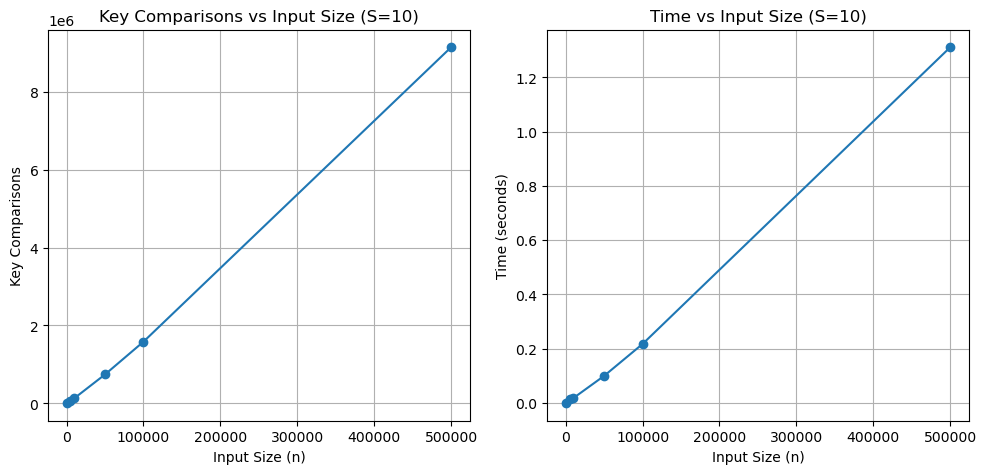

In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
global comparison_count
import numpy as np

# Function to load dataset from CSV file
def load_dataset(size):
    df = pd.read_csv(f'dataset_{size}.csv')  # Load the CSV file
    return df['Value'].tolist()  # Convert the column to a list

# Function to run hybrid sort with timing and comparison count
def run_hybrid_sort(arr, S):
    global comparison_count
    comparison_count = 0  # Reset comparison count
    start_time = time.time()
    hybrid_sort(arr, S)
    end_time = time.time()
    return comparison_count, end_time - start_time

# Sizes of datasets
sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]  

# Fixed S value for testing part c.i
S = 10
comparison_results = []
time_results = []

# Run Hybrid Sort for each dataset size
for size in sizes:
    dataset = load_dataset(size)  # Load the dataset from the CSV file
    comparisons, time_taken = run_hybrid_sort(dataset, S)
    comparison_results.append(comparisons)
    time_results.append(time_taken)
    print(f"Size {size}: Comparisons = {comparisons}, Time = {time_taken:.4f} seconds")

# Plotting results for part c.i
plt.figure(figsize=(10, 5))

# Plot for key comparisons vs input size
plt.subplot(1, 2, 1)
plt.plot(sizes, comparison_results, marker='o')
plt.title('Key Comparisons vs Input Size (S=10)')
plt.xlabel('Input Size (n)')
plt.ylabel('Key Comparisons')
plt.grid(True)

# Plot for time vs input size
plt.subplot(1, 2, 2)
plt.plot(sizes, time_results, marker='o')
plt.title('Time vs Input Size (S=10)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


Size 1000: Empirical Comparisons = 9448, Theoretical Comparisons = 14605.17
Size 5000: Empirical Comparisons = 59763, Theoretical Comparisons = 81073.04
Size 10000: Empirical Comparisons = 128598, Theoretical Comparisons = 169077.55
Size 50000: Empirical Comparisons = 741195, Theoretical Comparisons = 925859.66
Size 100000: Empirical Comparisons = 1582575, Theoretical Comparisons = 1921034.04
Size 500000: Empirical Comparisons = 9146422, Theoretical Comparisons = 10409889.14


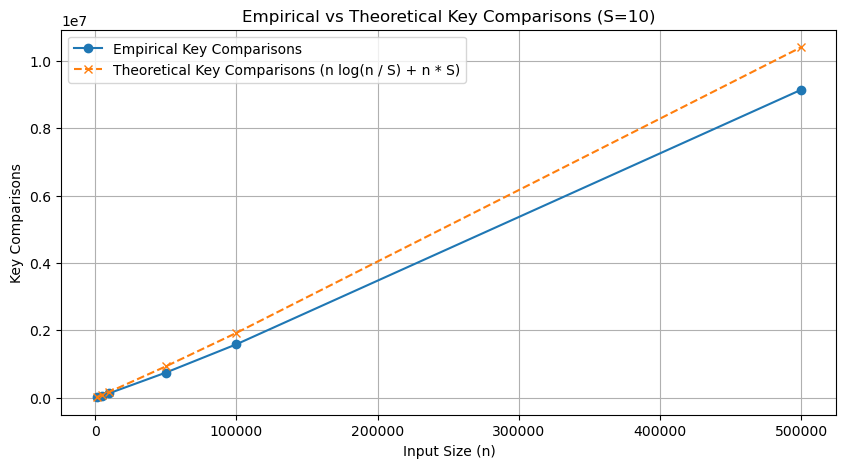

In [4]:
# Function to load dataset from CSV file
def load_dataset(size):
    df = pd.read_csv(f'dataset_{size}.csv')  # Load the CSV file
    return df['Value'].tolist()  # Convert the column to a list

# Function to run hybrid sort with timing and comparison count
def run_hybrid_sort(arr, S):
    global comparison_count
    comparison_count = 0  # Reset comparison count
    hybrid_sort(arr, S)
    return comparison_count

# Theoretical function for hybrid sort key comparisons
def hybrid_sort_theoretical(n, S):
    return n * np.log(n / S) + n * S

# Function to compare empirical vs theoretical key comparisons
def compare_empirical_and_theoretical(S):
    # Sizes of datasets
    sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]  
    
    # Initialize results
    empirical_comparison_results = []
    theoretical_comparison_results = []

    # Run Hybrid Sort for each dataset size and calculate theoretical values
    for size in sizes:
        dataset = load_dataset(size)  # Load the dataset from the CSV file
        empirical_comparisons = run_hybrid_sort(dataset, S)
        empirical_comparison_results.append(empirical_comparisons)

        # Calculate the theoretical key comparisons for this input size
        theoretical_comparisons = hybrid_sort_theoretical(size, S)
        theoretical_comparison_results.append(theoretical_comparisons)
        
        print(f"Size {size}: Empirical Comparisons = {empirical_comparisons}, Theoretical Comparisons = {theoretical_comparisons:.2f}")

    # Plotting results for empirical vs theoretical key comparisons
    plt.figure(figsize=(10, 5))
    
    # Plot for key comparisons vs input size
    plt.plot(sizes, empirical_comparison_results, marker='o', label="Empirical Key Comparisons")
    plt.plot(sizes, theoretical_comparison_results, marker='x', linestyle='--', label="Theoretical Key Comparisons (n log(n / S) + n * S)")
    
    plt.title(f'Empirical vs Theoretical Key Comparisons (S={S})')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Key Comparisons')
    plt.grid(True)
    plt.legend()
    plt.show()

# Set the threshold S
S = 10
compare_empirical_and_theoretical(S)


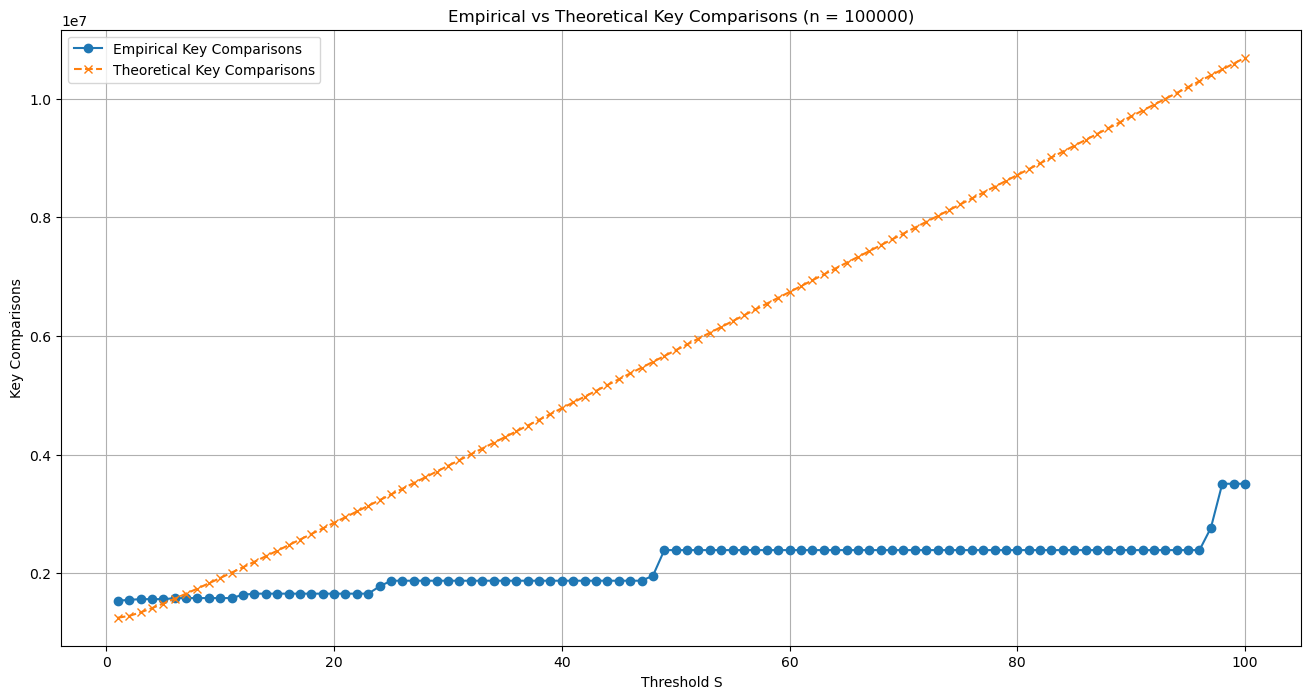

In [5]:
# Function to compare empirical vs theoretical key comparisons for varying S
def compare_key_comparisons_for_S(n, S_values):
    # Load fixed dataset for input size n
    dataset = load_dataset(n)
    
    # Initialize results
    empirical_comparison_results = []
    theoretical_comparison_results = []

    # Run Hybrid Sort for each value of S and calculate theoretical values
    for S in S_values:
        empirical_comparisons = run_hybrid_sort(dataset.copy(), S)  # Run hybrid sort with different S
        empirical_comparison_results.append(empirical_comparisons)

        # Calculate theoretical key comparisons for this input size and S
        theoretical_comparisons = hybrid_sort_theoretical(n, S)
        theoretical_comparison_results.append(theoretical_comparisons)
        
        #print(f"S = {S}: Empirical Comparisons = {empirical_comparisons}, Theoretical Comparisons = {theoretical_comparisons:.2f}")

    # Plotting results for empirical vs theoretical key comparisons
    plt.figure(figsize=(16, 8))
    # Plot for key comparisons vs S
    plt.plot(S_values, empirical_comparison_results, marker='o', label="Empirical Key Comparisons")
    plt.plot(S_values, theoretical_comparison_results, marker='x', linestyle='--', label="Theoretical Key Comparisons")
    
    plt.title(f'Empirical vs Theoretical Key Comparisons (n = {n})')
    plt.xlabel('Threshold S')
    plt.ylabel('Key Comparisons')
    plt.grid(True)
    plt.legend()
    plt.show()
    
# Set fixed input size and range of S values
n = 100000  # Example fixed input size
S_values = range(1, 101)  # Test S values from 1 to 100

# Compare empirical vs theoretical key comparisons
compare_key_comparisons_for_S(n, S_values)

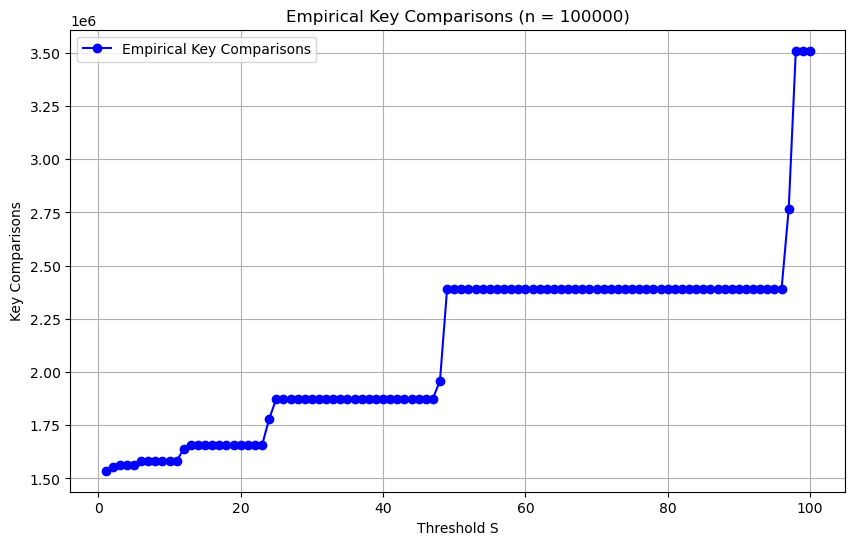

In [6]:
# Function to plot only the empirical key comparisons for varying S
def plot_empirical_key_comparisons_for_S(n, S_values):
    # Load fixed dataset for input size n
    dataset = load_dataset(n)
    
    # Initialize results
    empirical_comparison_results = []

    # Run Hybrid Sort for each value of S and record empirical key comparisons
    for S in S_values:
        empirical_comparisons = run_hybrid_sort(dataset.copy(), S)  # Run hybrid sort with different S
        empirical_comparison_results.append(empirical_comparisons)

    # Plotting results for empirical key comparisons
    plt.figure(figsize=(10, 6))
    
    # Plot for key comparisons vs S
    plt.plot(S_values, empirical_comparison_results, marker='o', label="Empirical Key Comparisons", color="blue")
    
    plt.title(f'Empirical Key Comparisons (n = {n})')
    plt.xlabel('Threshold S')
    plt.ylabel('Key Comparisons')
    plt.grid(True)
    plt.legend()
    plt.show()

# Set fixed input size and range of S values
n = 100000  # Example fixed input size
S_values = range(1, 101)  # Test S values from 1 to 100

# Plot empirical key comparisons
plot_empirical_key_comparisons_for_S(n, S_values)

Minimum time = 0.2199 seconds at S = 11


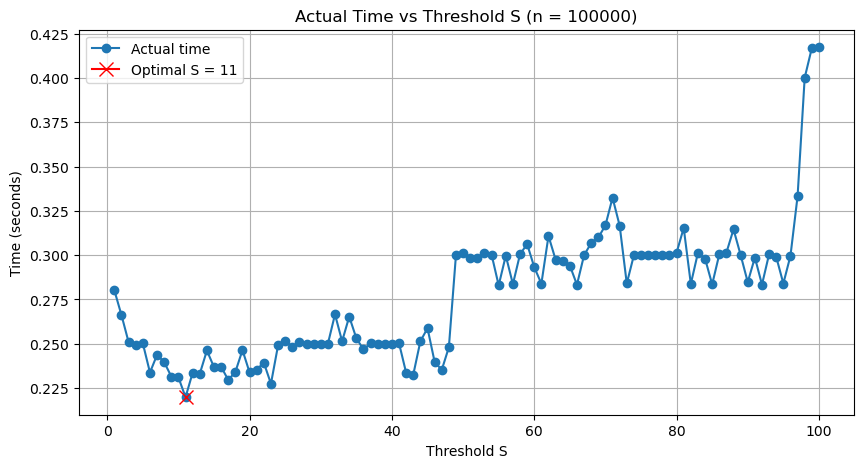

In [7]:
# Function to analyze time complexity for varying S and find the optimal S
def analyze_time_complexity_for_S(n, S_values):
    dataset = load_dataset(n)
    time_results = []

    # Run hybrid sort for each S and record the time taken
    for S in S_values:
        start_time = time.time()
        hybrid_sort(dataset.copy(), S)
        end_time = time.time()
        time_taken = end_time - start_time
        time_results.append(time_taken)

    # Find the minimum time and the corresponding S
    min_time = min(time_results)
    optimal_S = S_values[time_results.index(min_time)]

    print(f"Minimum time = {min_time:.4f} seconds at S = {optimal_S}")

    # Plot time complexity as a function of S
    plt.figure(figsize=(10, 5))
    plt.plot(S_values, time_results, marker='o', label="Actual time")
    
    # Highlight the optimal S on the plot
    plt.plot(optimal_S, min_time, marker='x', markersize=10, color="red", label=f"Optimal S = {optimal_S}")
    
    plt.title(f'Actual Time vs Threshold S (n = {n})')
    plt.xlabel('Threshold S')
    plt.ylabel('Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Optional: Analyze time complexity for different S values and find the optimal S
analyze_time_complexity_for_S(n, S_values)


In [8]:
# Function to perform merge sort and count key comparisons
def merge_sort(arr):
    global comparison_count
    comparison_count = 0  # Reset comparison count
    
    if len(arr) > 1:
        mid = len(arr) // 2  # Find the middle point
        left_half = arr[:mid]
        right_half = arr[mid:]

        # Recursively sort the two halves
        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        # Merge the sorted halves
        while i < len(left_half) and j < len(right_half):
            comparison_count += 1  # Count each comparison
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
